# Adult Salary Perdiction

The data of adults working class in the US is analyzed here and I have tried developing a Machine learning model which can predict salary their salary range. The machine learning model was prepared using the Logistic Regression Algorithm which gives a better score for Binary classified data.

Importing the data on Colab from Local System

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving adult_data.csv to adult_data.csv
User uploaded file "adult_data.csv" with length 3974475 bytes


# Import Data and Preorocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/adult_data.csv')

df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
df['salary'].value_counts()


 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()
#No missing values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

In [ ]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
salary                2
dtype: int64

In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


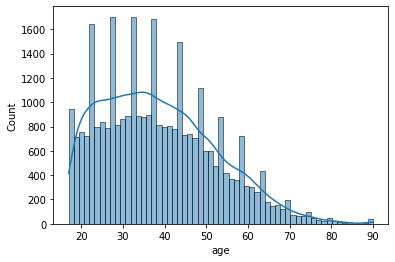

In [ ]:
sns.histplot(df['age'], kde=True)

In [ ]:
def outlier_detector(series):
  #sorting
  sorted(series)

  #Q3=quantile(.75) & Q1=quantile(.25)
  Q1,Q3 = np.percentile(series, [25,75])
  
  #IQR
  IQR = Q3 - Q1

  #Lower Range
  L_R = Q1 - (1.5 * IQR) 

  #Upper Range
  U_R = Q3 + (1.5 * IQR)

  #Return ranges
  return L_R, U_R


# Outier Detection of education-num	

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


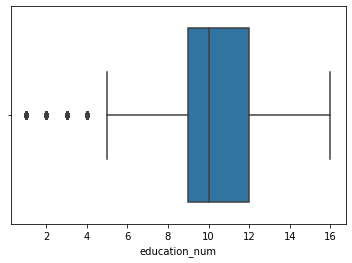

In [ ]:
sns.boxplot(df['education_num'])

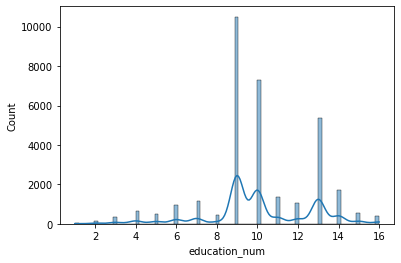

In [ ]:
sns.histplot(df.education_num, kde=True)

In [ ]:
lr,ur = outlier_detector(df.education_num)

In [ ]:
df.drop(df[(df.education_num < lr) | (df.education_num > ur)].index, inplace=True )

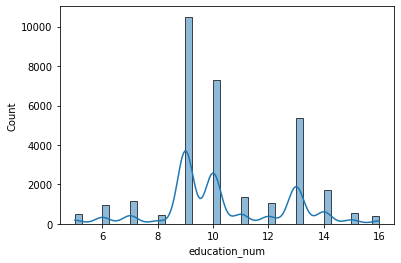

In [ ]:
sns.histplot(df.education_num, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


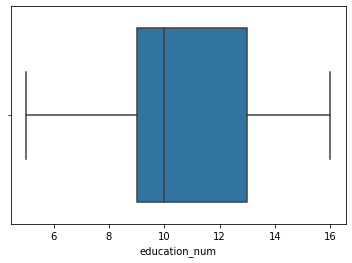

In [ ]:
sns.boxplot(df['education_num'])

#Outlier detection of capital_loss

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


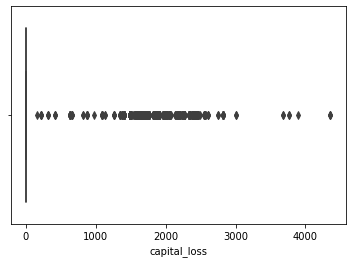

In [ ]:
sns.boxplot(df['capital_loss'])

In [ ]:
lr,ur = outlier_detector(df.capital_loss)

df.drop(df[(df.capital_loss < lr) | (df.capital_loss > ur)].index, inplace=True )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


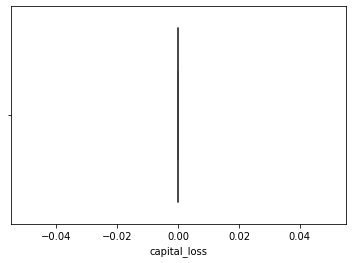

In [ ]:
sns.boxplot(df['capital_loss'])

# Removing outliers from hours_per_week

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


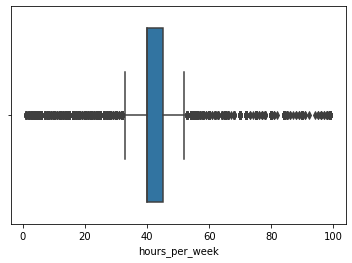

In [ ]:
sns.boxplot(df['hours_per_week'])

In [ ]:
lr,ur = outlier_detector(df.hours_per_week)

df.drop(df[(df.hours_per_week < lr) | (df.hours_per_week > ur)].index, inplace=True )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


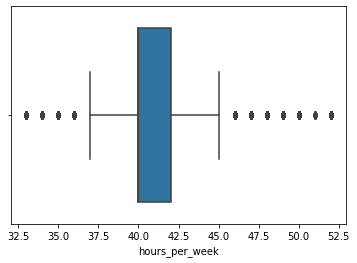

In [ ]:
sns.boxplot(df['hours_per_week'])

# Checking Correlation

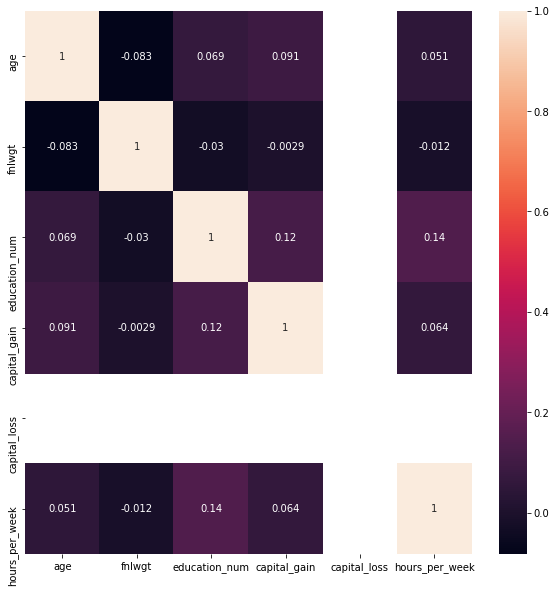

In [ ]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Feature Engineering

In [ ]:
df.nunique()

age                  72
workclass             9
fnlwgt            15603
education            12
education_num        12
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        106
capital_loss          1
hours_per_week       20
native_country       41
salary                2
dtype: int64

In [ ]:
df.marital_status.unique()

array([' Never-married', ' Divorced', ' Married-civ-spouse', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [ ]:
df = df.drop('fnlwgt',axis=1)

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'salary'],
      dtype='object')

# Final Data frame preparation for model creation

In [ ]:
df['salary']=df['salary'].replace(to_replace=[' <=50K', ' >50K'] , value=[ 0, 1])

In [ ]:
df['native_country'].unique()


array([' United-States', ' Cuba', ' India', ' ?', ' Puerto-Rico',
       ' Mexico', ' England', ' Germany', ' Iran', ' Philippines',
       ' Italy', ' Poland', ' Cambodia', ' Laos', ' Taiwan', ' Portugal',
       ' France', ' Canada', ' El-Salvador', ' Dominican-Republic',
       ' Jamaica', ' Honduras', ' Haiti', ' South', ' Japan',
       ' Yugoslavia', ' China', ' Peru', ' Outlying-US(Guam-USVI-etc)',
       ' Scotland', ' Trinadad&Tobago', ' Greece', ' Nicaragua',
       ' Guatemala', ' Vietnam', ' Hong', ' Ireland', ' Columbia',
       ' Ecuador', ' Thailand', ' Hungary'], dtype=object)

In [ ]:
df9 =df.native_country
df10 = df9.replace(to_replace=' ?', value=' United-States',)


In [ ]:
df['native_country'] = df10

In [ ]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [ ]:
df.salary.value_counts()

0    16206
1     5402
Name: salary, dtype: int64

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df

,age,education_num,capital_gain,capital_loss,hours_per_week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,37,14,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,10,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,27,12,0,0,38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,9,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Model Creation

In [ ]:
label = df.iloc[:,5].values
label

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
fearures = df.drop(labels= 'salary', axis=1).values
fearures.shape

(21608, 101)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit_transform(features)


array([[ 0.04211931,  1.22075289,  0.15695034, ...,  0.28771882,
        -0.04618856, -0.02357241],
       [-0.03951991, -0.60436887, -0.15350875, ...,  0.28771882,
        -0.04618856, -0.02357241],
       [ 1.18506845, -1.51692974, -0.15350875, ...,  0.28771882,
        -0.04618856, -0.02357241],
       ...,
       [ 0.12375854, -0.60436887, -0.15350875, ...,  0.28771882,
        -0.04618856, -0.02357241],
       [ 1.59326457, -0.60436887, -0.15350875, ...,  0.28771882,
        -0.04618856, -0.02357241],
       [ 1.10342923, -0.60436887,  1.99200064, ...,  0.28771882,
        -0.04618856, -0.02357241]])

Logistic Regression is best for Binary Classification

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=745)

In [ ]:
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Training Score:", model.score(X_train,y_train))         ##### JUST CHECKING GENERILISATION OF MODEL
                                                                          
print("Testing Score:", model.score(X_test,y_test))

Training Score: 0.8348374407034594
Testing Score: 0.8387320684868117


Testing score> Training score  -------so model is GENERILISED

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(label, model.predict(features))
cr = classification_report(label, model.predict(features))
Accuracy_Score = accuracy_score(label, model.predict(features))
print('Confusion Matrix is \n {}\n\nClassification Report is \n{}\n\nAccuracy_Score:{}'.format(cm,cr,Accuracy_Score))

Confusion Matrix is 
 [[15028  1178]
 [ 2374  3028]]

Classification Report is 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     16206
           1       0.72      0.56      0.63      5402

    accuracy                           0.84     21608
   macro avg       0.79      0.74      0.76     21608
weighted avg       0.83      0.84      0.83     21608


Accuracy_Score:0.8356164383561644


In [ ]:
from sklearn.metrics import accuracy_score
Accuracy_Score = accuracy_score(label, model.predict(features))
print(Accuracy_Score)

0.8356164383561644


# ACCURACY SCORE:  0.8356164383561644